<a href="https://colab.research.google.com/github/ancka019/ComputationsMethods/blob/main/%20hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import geopandas as gpd
import contextily as ctx

In [ ]:
pip install geopandas

     |████████████████████████████████| 994 kB 32.0 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 38.8 MB/s 


In [ ]:
pip install contextily

     |████████████████████████████████| 19.3 MB 68.7 MB/s 


In [ ]:
df = pd.read_csv('/content/ALL_SPB_STOPS.csv', sep=';', encoding='Windows-1251', decimal=',')
df.head()

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE
0,100101,Пр.Ветеранов-1,59.8416038827508,30.2539842396693
1,100102,Пр.Ветеранов-2,59.8420417837763,30.25008403131
2,100103,Ленинский пр.-1,59.8516834239607,30.2683847248898
3,100104,Ленинский пр.-2,59.8497096845857,30.2683477910985
4,100105,Автово,59.8672920598579,30.2611327749718


In [ ]:
metro = df[df['ID_STOP'].astype('str').str.match('100')]
metro

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE
0,100101,Пр.Ветеранов-1,59.8416038827508,30.2539842396693
1,100102,Пр.Ветеранов-2,59.8420417837763,30.25008403131
2,100103,Ленинский пр.-1,59.8516834239607,30.2683847248898
3,100104,Ленинский пр.-2,59.8497096845857,30.2683477910985
4,100105,Автово,59.8672920598579,30.2611327749718
...,...,...,...,...
70,100513,Чкаловская,59.9609866306347,30.2920463582738
71,100514,Крестовский остров,59.9717924205307,30.2594135069873
72,100515,Старая Деревня,59.9895383917864,30.2552178282978
73,100516,Комендантский пр.,60.0078102700019,30.2594762944325


In [ ]:
List = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
List.crs = "EPSG:4326"
List

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,geometry
0,100101,Пр.Ветеранов-1,59.8416038827508,30.2539842396693,POINT (30.25398 59.84160)
1,100102,Пр.Ветеранов-2,59.8420417837763,30.25008403131,POINT (30.25008 59.84204)
2,100103,Ленинский пр.-1,59.8516834239607,30.2683847248898,POINT (30.26838 59.85168)
3,100104,Ленинский пр.-2,59.8497096845857,30.2683477910985,POINT (30.26835 59.84971)
4,100105,Автово,59.8672920598579,30.2611327749718,POINT (30.26113 59.86729)
...,...,...,...,...,...
7149,4997,ЗАВОД ИМ. КАЛИНИНА [тест] <,59.95069505060761,30.2661324,POINT (30.26613 59.95070)
7150,4998,МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <,59.94569778533688,30.2719688,POINT (30.27197 59.94570)
7151,5003,АДМИРАЛТЕЙСКИЙ ПР. [тест] <,59.93602605740318,30.3092594,POINT (30.30926 59.93603)
7152,7069,ПР. ЛУНАЧАРСКОГО(тест),60.03143940049296,30.3925724,POINT (30.39257 60.03144)


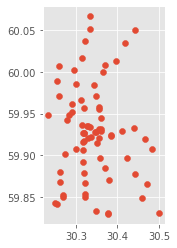

In [ ]:
gmetro = gpd.GeoDataFrame(
    metro, geometry=gpd.points_from_xy(metro.LONGITUDE, metro.LATITUDE))
gmetro.crs = "EPSG:4326"
gmetro.plot()

AttributeError: ignored

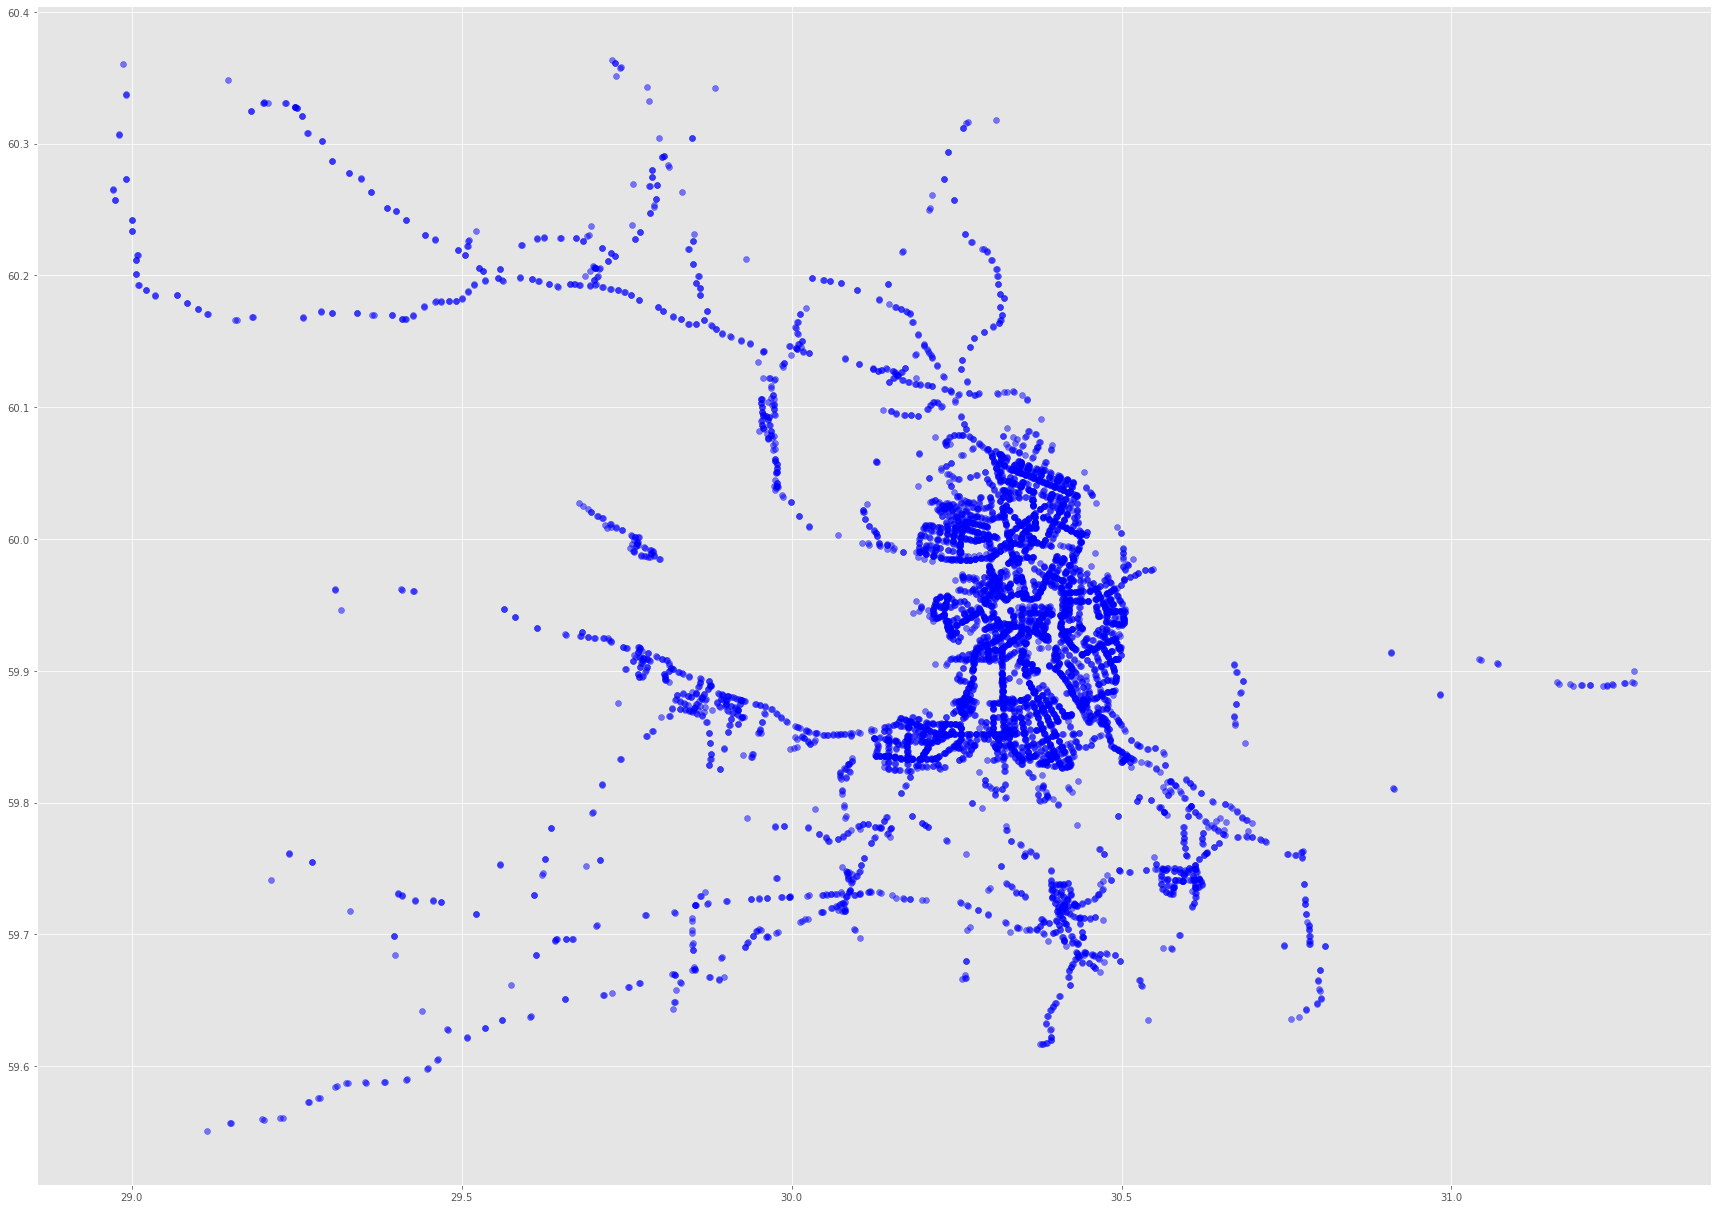

In [ ]:
ax = List.plot(color="blue", figsize=(30, 30), alpha=0.5)
ctx.add_basemap(ax, 
                crs= df.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

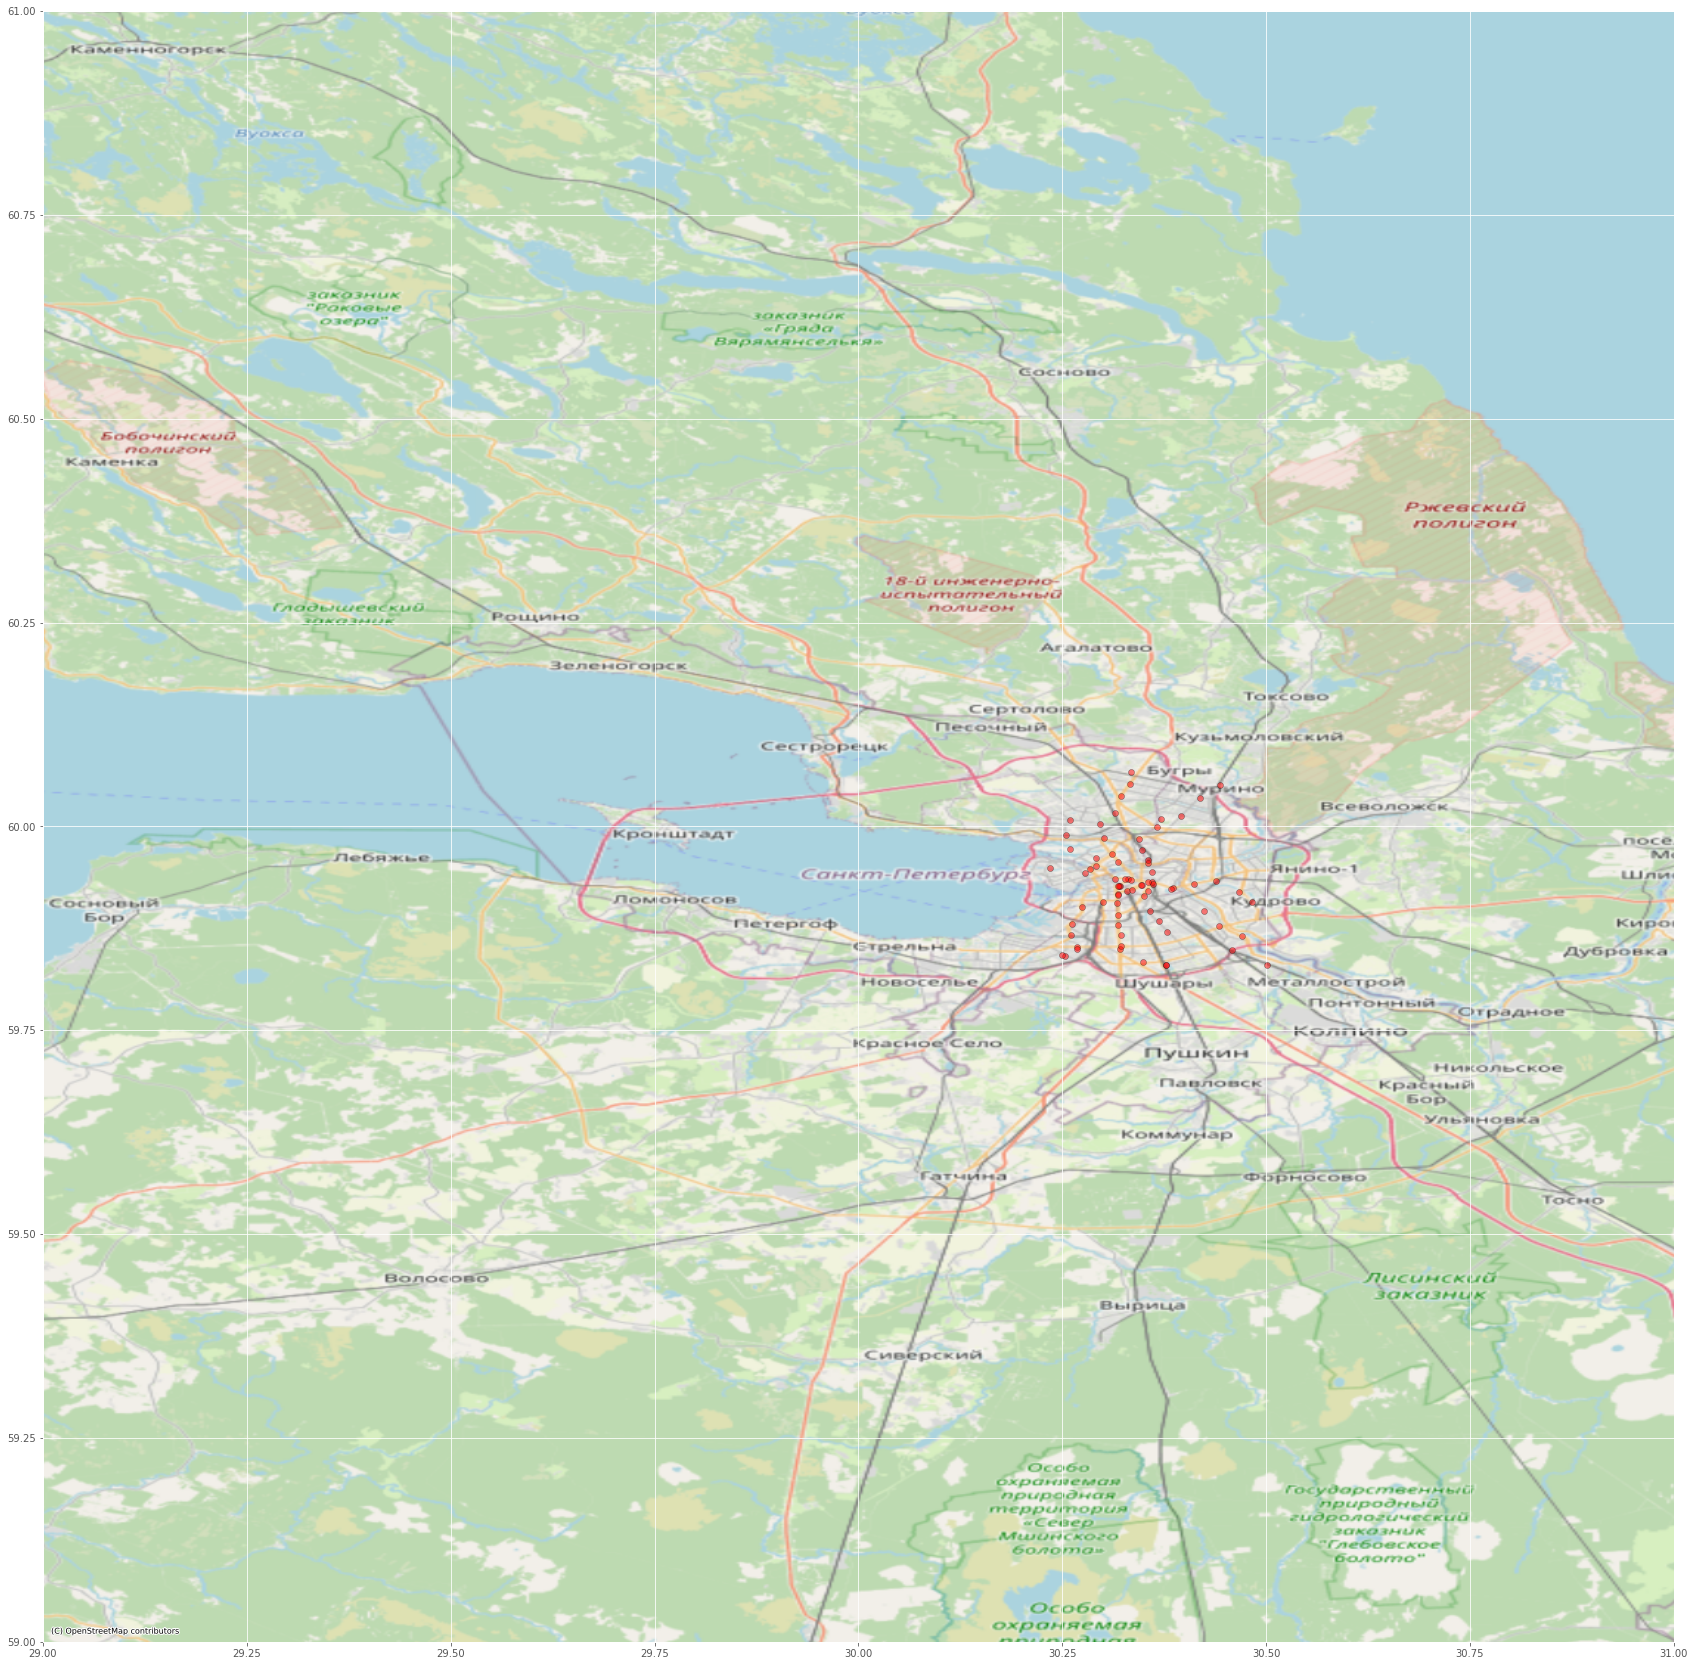

In [ ]:
ax = gmetro.plot(color="red", figsize=(30, 30), alpha=0.5, edgecolor='k')
ax.axis((29, 31, 59, 61))
ctx.add_basemap(ax, crs=gmetro.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
ax = gdf[gdf['ID_STOP'] == 100105].plot(color="red", figsize=(30, 30), alpha=0.5, edgecolor='k')
ax.axis((29, 31, 59, 61))
ctx.add_basemap(ax, crs=gmetro.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom = 10)

In [ ]:
gdf.to_crs(epsg=3310,inplace=True)
gmetro.to_crs(epsg=3310,inplace=True)
near = gdf[gdf.distance(gmetro.geometry[4]) < 1000]
near.to_crs(epsg=4326,inplace=True)
near

In [ ]:
link = linkage(near[['LONGITUDE', 'LATITUDE']], 'ward', 'euclidean')
plt.figure(figsize=(10, 7))
dendrogram(link,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
dist = link[:, 2]
dist

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 clusters')
plt.text(22, 2.6, '4 clusters')

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

In [ ]:
near['cluster'] = fcluster(link, 0.008, criterion='distance')
near.sort_values('cluster').head(60)

In [ ]:
near.plot(markersize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

near.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

In [ ]:
ax = near.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(20, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=near.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)